## Package Installation

In [1]:
!pip install -e /home/aku7cf/DREAMS/DREAMS_python
# !pip install -e /path/to/DREAMS_python

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/aku7cf/DREAMS/DREAMS_python
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for dreams_python (pyproject.toml) ... done
  Created wheel for dreams_python: filename=dreams_python-0.1.0-0.editable-py3-none-any.whl size=4485 sha256=64075199001abbaf0a0e3f0ff0cd688604b4326f24d56dd3ac5f99c849f88dba
  Stored in directory: /tmp/pip-ephem-wheel-cache-r267v6no/wheels/93/9c/36/d4c59b3fc31ec2b5dc143e4a986198ab2224d05d41a91e194c
Successfully built dreams_python
  Attempting uninstall: dreams_python
    Found existing installation: dreams_python 0.1.0
    Uninstalling dreams_python-0.1.0:
      Successfully uninstalled dreams_python-0.1.0


In [17]:
import dreams_python
import numpy as np
import matplotlib.pyplot as plt

## Load in entire SubLink Catalog

In [18]:
rvs = dreams_python.DREAMS('/standard/DREAMS',suite='varied_mass',DM_type='CDM',sobol_number=9, box_or_run='run')

In [42]:
run  = 0
snap = 90

In [43]:
sublink_catalog = rvs.read_sublink_cat(run) ## note that a DMO=True option is available here, too!
print('Sublink Keys:')
print(sublink_catalog.keys())

Sublink Keys:
dict_keys(['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallici

## Get halo's main progenitor branch

The "main progenitor branch" (mpb) are the most massive progenitors of a particular subhalo at each individual snaphsot.

Note that the main progenitor branch is not guarenteed to exist for all subhalos

In [44]:
## First identify target
params, header = rvs.read_param_file('TNG_SB9.txt')
target_masses = params[:, 0]

central_idx = rvs.get_target_central_subhalo_index(run, snap, target_masses[run])

mpb = rvs.get_sublink_mpb(run, snap, subhalo_idx=central_idx)

In [45]:
print(mpb['SnapNum'])

[90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67
 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43
 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19
 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4]


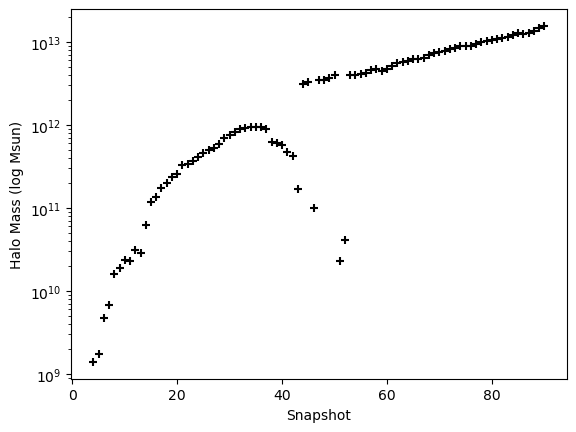

In [46]:
h = rvs.get_h(run, snap)
plt.scatter( mpb['SnapNum'], mpb['SubhaloMass']*1.00E+10/h, color='k', marker='+' )

plt.xlabel('Snapshot')
plt.ylabel('Halo Mass (log Msun)')

plt.yscale('log')

plt.show()

## Full Merger Tree associated with object

In [47]:
full_tree = rvs.get_sublink_tree(run, snap, subhalo_idx=central_idx)

In [48]:
print(full_tree['SnapNum'].shape)

(6367,)


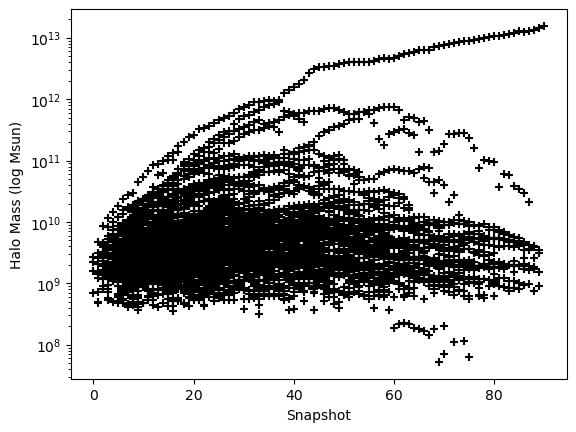

In [49]:
h = rvs.get_h(run, snap)
plt.scatter( full_tree['SnapNum'], full_tree['SubhaloMass']*1.00E+10/h, color='k', marker='+' )

plt.xlabel('Snapshot')
plt.ylabel('Halo Mass (log Msun)')

plt.yscale('log')

plt.show()

### Make plot of whole merger tree

This plot is based on [Leisher+2025](https://ui.adsabs.harvard.edu/abs/2025arXiv251105367L/abstract) Figure 1

In [50]:
cat = full_tree

snap = cat['SnapNum']
root = cat['LastProgenitorID']
mass = cat['SubhaloMass']

colors = np.log10(mass * 1e10 / h)
sizes  = mass

In [51]:
def get_edges(subid, desid):
    edges = []
    for i in range(len(subid)):
        for j in range(len(desid)):
            if subid[i] == desid[j]:
                edges.append((i, j))
    return edges

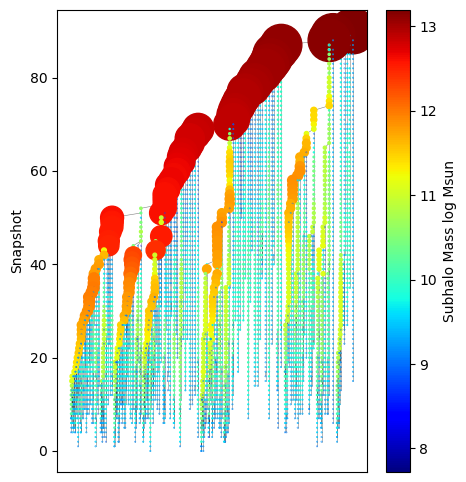

In [52]:
fig, ax = plt.subplots(figsize=(5, 6))

edges = get_edges(cat['SubhaloID'], cat['DescendantID'])

# Draw edges
for src, dst in edges:
    ax.plot([root[src], root[dst]], [snap[src], snap[dst]], color='black', linewidth=0.4, alpha=0.5, zorder=1)

sc = ax.scatter(root, snap, s=sizes, c=colors, cmap='jet', alpha=1.0, zorder=2)

ax.set_ylabel("Snapshot")
ax.set_xticks([])
ax.tick_params(axis='y')

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Subhalo Mass log Msun")

plt.show()